In [1]:
# TMDBML : TMDB 머신러닝 모델 만들기
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/movie_data_final.csv")
df.head() # title : str

,title,budget,genres,country,main_charactor,director,vote_average,vote_count
0,{616037: 'Thor: Love and Thunder'},250000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",{3894: 'Christian Bale'},{55934: 'Taika Waititi'},6.772,1752
1,{438148: 'Minions: The Rise of Gru'},85000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...","[{'iso_3166_1': 'US', 'name': 'United States o...",{124747: 'Pierre Coffin'},{8023: 'Kyle Balda'},7.795,1166
2,{507086: 'Jurassic World Dominion'},165000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","[{'iso_3166_1': 'US', 'name': 'United States o...",{18997: 'Bryce Dallas Howard'},{930707: 'Colin Trevorrow'},7.117,2622
3,{361743: 'Top Gun: Maverick'},170000000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",{996701: 'Miles Teller'},{86270: 'Joseph Kosinski'},8.334,1852
4,{756999: 'The Black Phone'},18800000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",{1530558: 'Madeleine McGraw'},{55499: 'Scott Derrickson'},7.975,1671


In [3]:
# vote_average를 가중치를 부여
# vote = (v/(v+m))*R + (m/(v+m))*C
# v : 개별 영화에 투표한 횟수, m : 평점을 부여하기 위한 최소 투표 횟수
# R : 개별 영화에 대한 평균 평점(=vote_average), C : 전체 영화에 대한 평균 평점

In [4]:
# m : 투표 횟수의 평균 * 60%
# C : 평균 평점 * 60 %
m = df.vote_average.mean() * 60 / 100
C = df.vote_count.mean() * 60 / 100
print("m : ", m)
print("C : ", C)

m :  3.927044210526323
C :  1494.659298245614


In [5]:
v = df.vote_count
R = df.vote_average
df['result'] = (v/(v+m))*R + (m/(v+m))*C
df.head(1)

,title,budget,genres,country,main_charactor,director,vote_average,vote_count,result
0,{616037: 'Thor: Love and Thunder'},250000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",{3894: 'Christian Bale'},{55934: 'Taika Waititi'},6.772,1752,10.099587


In [6]:
df.result.mean()

24.572970677881074

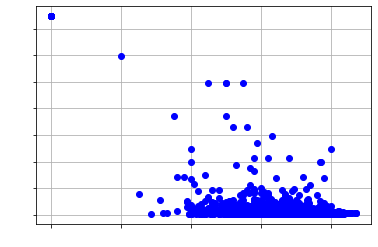

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['text.color'] = 'white'
# 세로 : result, 세로 : vote_average
plt.plot(df.vote_average, df.result, 'bo')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid()
plt.show()

In [8]:
import ast #형태가 리스트/딕셔너리인 문자열을 다시 리스트/딕셔너리 형태로 바꿀 수 있다.

In [9]:
# title: 이름, id/ genres: to_categorical/ country: to_categorical/ charactor: 이름, id/ director: 이름, id/ result 0 or 1
# numpy 배열 (5302,)
df_list = []
title, budget, genres, country, charactor, director, result=[], [], [], [], [], [], []
for idx in df.index:
    title.append([ast.literal_eval(df.title[idx])])
    budget.append([int(df.budget[idx])])
    genres.append(ast.literal_eval(df.genres[idx]))
    country.append(ast.literal_eval(df.country[idx]))
    charactor.append([ast.literal_eval(df.main_charactor[idx])])
    director.append([ast.literal_eval(df.director[idx])])
    result.append([1 if df.vote_average[idx] >= 0.5 else 0])
df_list.append([title, budget, genres, country, charactor, director, result])
df_arr = np.array(df_list)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31020\1461928817.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df_arr = np.array(df_list)


In [10]:
# for title, charactor, director
class SeperateID_Name:
    def __init__(self, column):
        self.id = []
        self.name = []
        self.column = column

    def print(self):
        for col in self.column:
            for key, value in col[0].items():
                self.id.append(int(key))
                self.name.append(str(value))
        return self.id, self.name

In [11]:
# title : dictionary about title_ID & title_Name
sep_title = SeperateID_Name(title)
title_ID, title_Name = sep_title.print()
# charactor : dictionary about char_ID & char_Name
sep_charactor = SeperateID_Name(charactor)
char_ID, char_Name = sep_charactor.print()
# director : dictionary about dir_ID & dir_Name
sep_director = SeperateID_Name(director)
dir_ID, dir_Name = sep_director.print()

In [12]:
df.head()

,title,budget,genres,country,main_charactor,director,vote_average,vote_count,result
0,{616037: 'Thor: Love and Thunder'},250000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",{3894: 'Christian Bale'},{55934: 'Taika Waititi'},6.772,1752,10.099587
1,{438148: 'Minions: The Rise of Gru'},85000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...","[{'iso_3166_1': 'US', 'name': 'United States o...",{124747: 'Pierre Coffin'},{8023: 'Kyle Balda'},7.795,1166,12.785894
2,{507086: 'Jurassic World Dominion'},165000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","[{'iso_3166_1': 'US', 'name': 'United States o...",{18997: 'Bryce Dallas Howard'},{930707: 'Colin Trevorrow'},7.117,2622,9.341603
3,{361743: 'Top Gun: Maverick'},170000000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",{996701: 'Miles Teller'},{86270: 'Joseph Kosinski'},8.334,1852,11.478986
4,{756999: 'The Black Phone'},18800000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",{1530558: 'Madeleine McGraw'},{55499: 'Scott Derrickson'},7.975,1671,11.460689


In [13]:
# country dictionry name to id 만들기
country_data = []
for cs in country:
    for c in cs:
        country_data.append(c['name'])
country_dict = {}
i = 0
for l in country_data:
    try: country_dict[l]  # 찾으면 패스 못찾으면 선언 및 아이디 부여
    except: 
        country_dict[l] = i
        i += 1

In [14]:
len(country_dict)

92

In [15]:
# for genres, country
class SeperateID_Name_list:
    def __init__(self, column):
        self.ids, self.id = [], []
        self.names, self.name = [], []
        self.column = column
    def print(self):
        for cols in self.column:
            for col in cols:
                self.id.append(list(col.values())[0])
                self.name.append(list(col.values())[1])
            self.ids.append(self.id)
            self.names.append(self.name)
            self.id = []
            self.name = []
        return self.ids, self.names

In [16]:
# genres
sep_genres = SeperateID_Name_list(genres)
genre_ID, genre_Name = sep_genres.print()
# country 
sep_country = SeperateID_Name_list(country)
country_ID, country_Name = sep_country.print()

In [17]:
# country_ID id 저장
country_I = []
country_ID = []
for names in country_Name:
    for name in names:
        country_I.append(country_dict[name])
    country_ID.append(country_I)
    country_I = []

In [18]:
df.head(1)

,title,budget,genres,country,main_charactor,director,vote_average,vote_count,result
0,{616037: 'Thor: Love and Thunder'},250000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",{3894: 'Christian Bale'},{55934: 'Taika Waititi'},6.772,1752,10.099587


In [19]:
print(len(title_ID), len(budget), len(genre_ID))

5130 5130 5130
